In [1]:
import scipy.linalg
import numpy as np
import matplotlib.pyplot as plt
import time

10
[[1.04198423e+02 9.86325606e+00 1.41374698e+00 2.31912280e-01
  9.76972441e+00 1.27965247e+00 9.62536495e+00 2.84817067e+00
  3.67590464e+00 1.42575087e+00]
 [7.96215932e+00 1.08247757e+02 3.57859869e+00 2.81089524e+00
  1.18528392e+00 5.04873359e-01 4.54105334e+00 3.01312335e+00
  1.42529619e+00 4.09835841e+00]
 [9.17222224e+00 5.94826722e+00 1.01921278e+02 3.50011058e+00
  3.03497469e-02 9.02811223e+00 5.49408745e+00 5.55723072e+00
  6.89695463e+00 4.76045377e+00]
 [7.59335257e+00 3.07149847e+00 8.28647082e+00 1.08856299e+02
  2.86992853e+00 2.27959052e+00 7.40110926e+00 9.45913408e+00
  2.11033802e+00 2.90385853e+00]
 [3.90269020e+00 8.69882186e-01 3.92411406e+00 9.11971018e+00
  1.00091551e+02 8.12512426e+00 2.32013045e+00 9.18992540e+00
  2.49471314e+00 6.28654685e+00]
 [1.86977776e+00 3.34294078e+00 1.40508972e+00 1.65282176e+00
  7.31294205e+00 1.01128605e+02 2.46434739e-01 6.79669453e+00
  4.17320618e-01 7.29229059e+00]
 [5.06254029e+00 9.08958683e+00 8.15385072e+00 5.974885

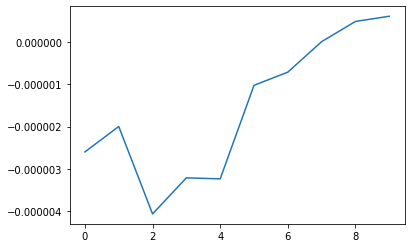

0.1574230194091797


In [3]:
eps = 0.000001
n = int(input())
startTime = time.time()
def dif(x, xnew):
    s = 0
    for i in range(n):
        s += xnew[i] - x[i]
    s *= s
    return s
    
def zeidel(A, f, x):
    xnw = [0] * n
    for i in range(n):
        s = 0
        for j in range(i):
            s = s + A[i][j] * xnw[j]
        for j in range(i + 1, n):
            s = s + A[i][j] * x[j]            
        xnw[i] = (f[i] - s) / A[i][i]
    return xnw

def solve(A, f):
    xnew = np.random.uniform(0, n, n)
    while True:
        x = xnew
        xnew = zeidel(A, f, x)
        if dif(x, xnew) < eps:
            break
    return xnew

A = np.random.uniform(0, n, (n, n))
for i in range(n):
    A[i][i] = A[i][i] + n * n;
f = np.random.uniform(0, n, n)
print(A)
print(f)
plt.plot(np.linalg.solve(A, f) - solve(A, f))
plt.show()
print(time.time() - startTime)